In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

In [2]:
df = pd.read_csv("superstore.csv", parse_dates=["Order Date"], index_col="Order Date", encoding="latin1")
df = df["Sales"].dropna()
df = df.groupby(pd.Grouper(freq="M")).sum()
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9804\1537330180.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.groupby(pd.Grouper(freq="M")).sum()


Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

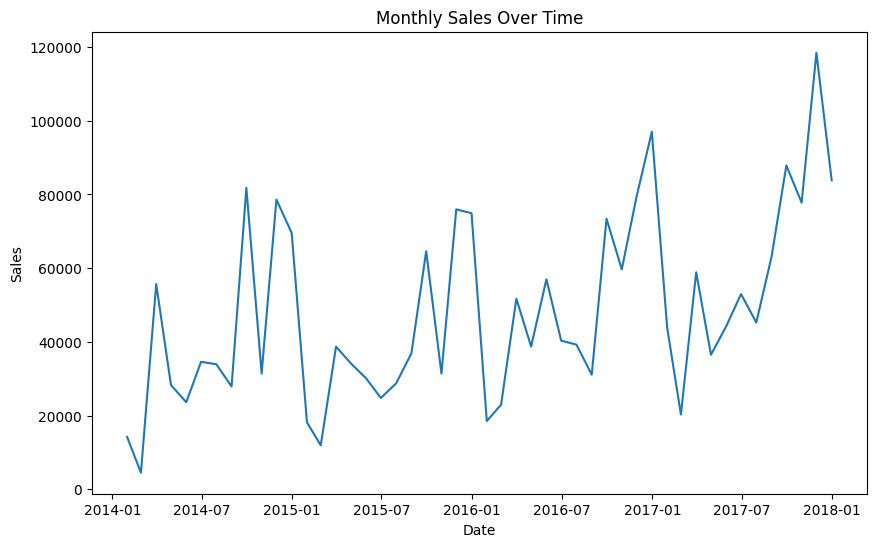

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [4]:
#checking whether the series is stationary

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    return result[1] < 0.05

is_stationary = check_stationarity(df)
print(f"\n Time series is {'stationary' if is_stationary else 'non-stationary'}")

	1%: -3.5778480370438146
	5%: -2.925338105429433
	10%: -2.6007735310095064

 Time series is stationary


In [15]:
horizon = 12
y_train = df.iloc[:-horizon ]
y_test = df.iloc[-horizon:]

Text(0.5, 1.0, 'Train and Test Split')

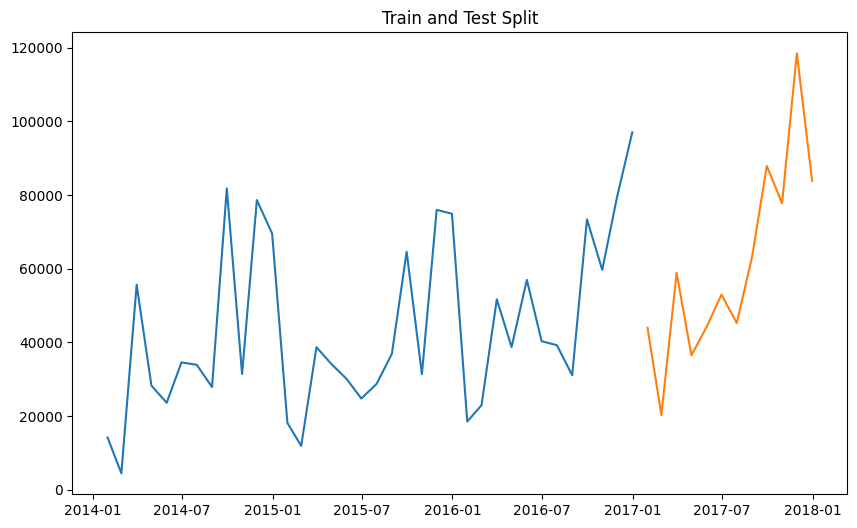

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train.values)
plt.plot(y_test.index, y_test.values)
plt.title("Train and Test Split")

In [17]:
auto_pdq = auto_arima(y_train, seasonal=True, m=12, trace=True, suppress_warnings=True, stepwise=False)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=829.308, Time=0.01 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=821.686, Time=0.04 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=820.452, Time=0.06 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=828.881, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=823.025, Time=0.06 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=822.295, Time=0.10 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=828.376, Time=0.09 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=829.442, Time=0.01 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=821.857, Time=0.07 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=820.569, Time=0.11 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=829.003, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=823.412, Time=0.09 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=822.514, Time=0.16 sec
 ARIMA(0,0,1)(2,0,

In [18]:
print(auto_pdq.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   36
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                -404.061
Date:                             Thu, 05 Feb 2026   AIC                            818.122
Time:                                     11:58:11   BIC                            826.039
Sample:                                 01-31-2014   HQIC                           820.885
                                      - 12-31-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    2.56e+04   3.52e+04      0.728      0.467   -4.33e+04    9.45e+04
ar.L1         -0.5340      

In [19]:
model = ARIMA(y_train,
              order=auto_pdq.order, seasonal_order= auto_pdq.seasonal_order)
results = model.fit()

In [20]:
forecast = results.get_forecast(steps=horizon)

y_pred = forecast.predicted_mean
conf_int = forecast.conf_int()

y_pred.index = y_test.index
conf_int.index = y_test.index

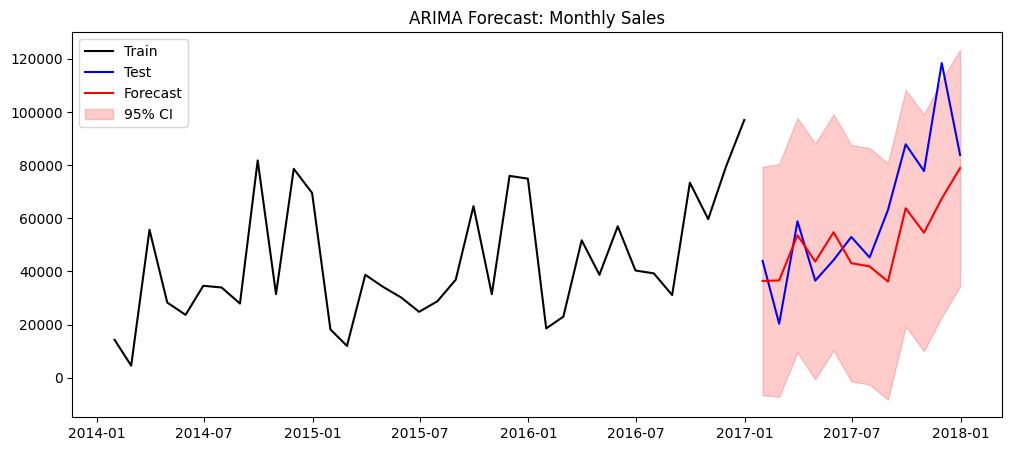

In [22]:
plt.figure(figsize=(12, 5))

plt.plot(y_train.index, y_train, label="Train", color="black")
plt.plot(y_test.index, y_test, label="Test", color="blue")
plt.plot(y_pred.index, y_pred, label="Forecast", color="red")

plt.fill_between(
    y_test.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    alpha=0.2,
    color="red",
    label="95% CI"
)

plt.legend()
plt.title("ARIMA Forecast: Monthly Sales")
plt.show()